In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def generate_data(filepath):
    np.savetxt(filepath, np.random.rand(100, 2))

generate_data('kmeans.csv')

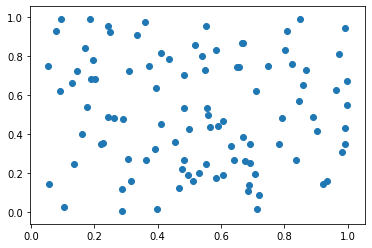

In [11]:
data = np.loadtxt('kmeans.csv')

plt.scatter(data[:,0], data[:,1])
plt.show()

In [7]:
# 计算欧式距离
def distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

distance(data[0], data[1])

0.06112938958407108

In [32]:
def random_select(data, k):
    l = len(data)
    center_indexes = np.random.choice(list(range(l)), k).tolist()
    return center_indexes, [data[i] for i in center_indexes]

In [58]:
k = 4
initial_indexes, initial_centers = random_select(data, k)
print(initial_indexes, initial_centers)

[80, 75, 35, 91] [array([0.48196334, 0.26337674]), array([0.63042512, 0.33591037]), array([0.46881202, 0.12418894]), array([0.17793902, 0.53651043])]


In [95]:
# Kmeans 聚类
# 结束条件：1.当循环次数到达 k 次 2.新质心点距上一次距离不超过 error 值
def cluster(data, centers=None, center_indexes=None, k=1000, error=0.0000001):
    if centers is None and center_indexes is None:
        raise('centers and center_indexes must have one passed')

    clusters = None
    if centers is not None:
        clusters = [[] for i in range(len(centers))]

    if center_indexes is not None:
        clusters = [[] for i in range(len(center_indexes))]
        centers = np.array([data[i] for i in center_indexes])

    for i, d in enumerate(data):
        distances = [distance(data[i], center) for center in centers]
        index = distances.index(min(distances))
        clusters[index].append(d)

    # 输出每一次分类的结果图
    # colors = ['#00FF00', '#800000', '#9370DB', '#FFFF00']
    # for i, c in enumerate(clusters):
    #     tmp = np.array(c)
    #     plt.scatter(tmp[:,0], tmp[:,1], color=colors[i])
    # plt.show()

    new_centers = np.array([np.array(c).mean(axis=0) for c in np.array(clusters)])

    if k == 0 or np.max(np.sqrt((new_centers - centers) ** 2)) < error:
        return np.array(clusters)
    else:
        return cluster(data, centers=new_centers, k=k-1, error=error)

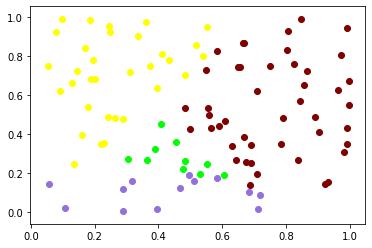

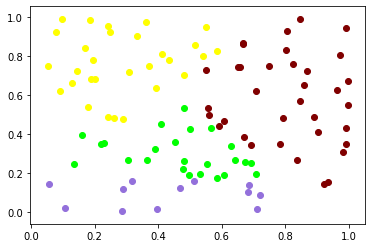

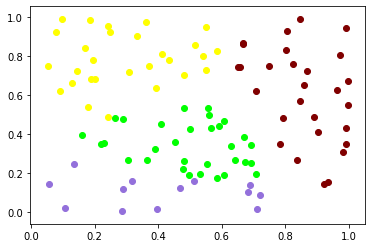

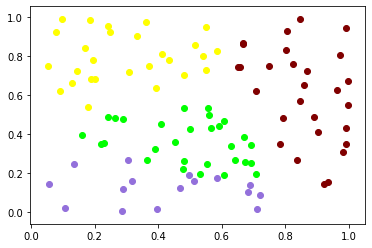

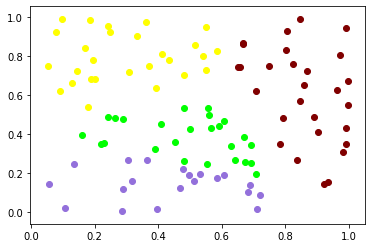

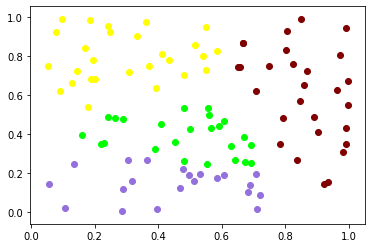

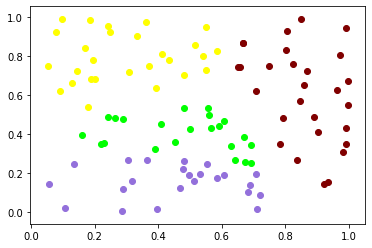

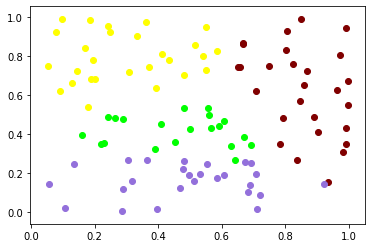

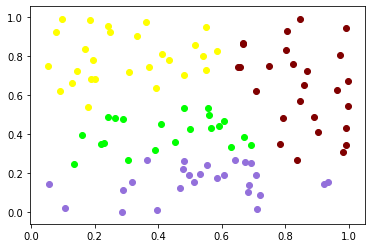

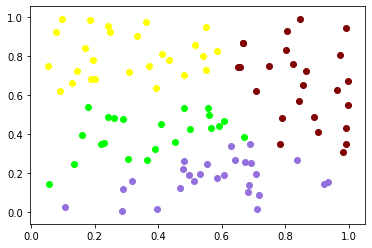

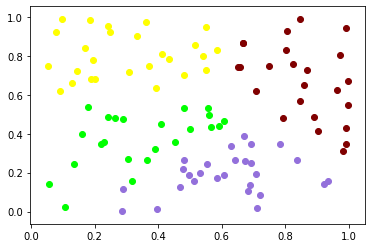

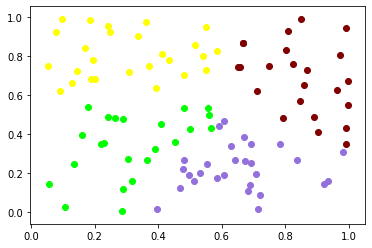

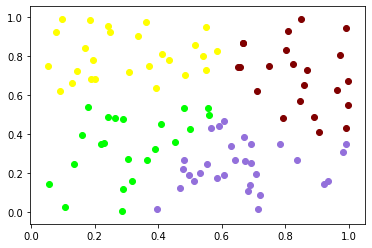

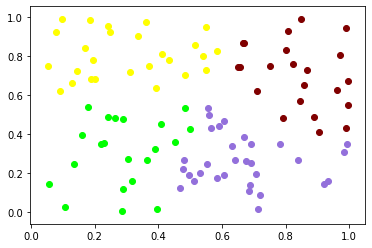

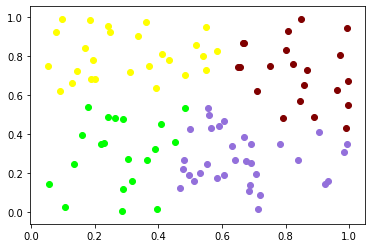

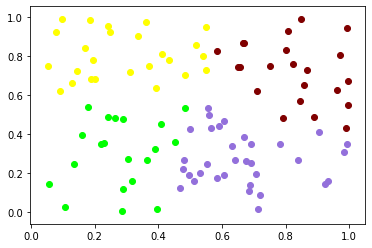

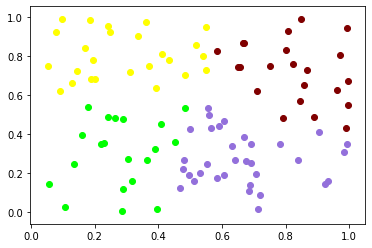

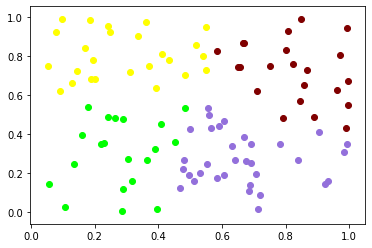

In [96]:
clusters = cluster(data, initial_centers, initial_indexes, k=1000, error=0.0000001)

# 最终的结果图
colors = ['#00FF00', '#800000', '#9370DB', '#FFFF00']
for i, c in enumerate(clusters):
    tmp = np.array(c)
    plt.scatter(tmp[:,0], tmp[:,1], color=colors[i])
plt.show()

<class 'list'>
[array([0.47805552, 0.40203211]), array([0.85349247, 0.60761011]), array([0.45559806, 0.15349502]), array([0.29808902, 0.79583867])]


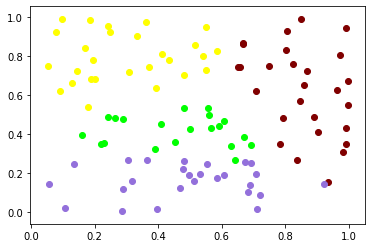

In [82]:
new_centers = [np.array(c).mean(axis=0) for c in clusters]
print(type(new_centers))
print(new_centers)

clusters = cluster(data, new_centers)
for i, c in enumerate(clusters):
    tmp = np.array(c)
    plt.scatter(tmp[:,0], tmp[:,1], color=colors[i])
plt.show()